In [ ]:
!pip install tensorflow
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt

# importing rudy 60k, hulk 285k and benign 73k benign

In [ ]:
cols = ['Timestamp', 'Src Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'TotLen Fwd Pkts', 'Fwd Pkt Len Max',
       'Flow IAT Mean', 'Fwd Header Len', 'Init Fwd Win Byts', 'Label']

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/HULK.pcap_Flow.csv')
df1.drop(df1.columns[0],axis=1,inplace=True)
df1.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.29.195,3000,192.168.29.63,49533,6,02/07/2022 01:12:10 PM,6876,0,2,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
1,192.168.29.195,3000,192.168.29.63,49342,6,02/07/2022 01:12:10 PM,3671,1,1,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
2,192.168.29.195,3000,192.168.29.63,49533,6,02/07/2022 01:12:10 PM,596,1,1,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
3,192.168.29.63,49341,192.168.29.195,3000,6,02/07/2022 01:12:10 PM,617,0,3,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
4,192.168.29.63,49532,192.168.29.195,3000,6,02/07/2022 01:12:10 PM,2358,0,3,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label


In [ ]:
df1.Label = 1

In [ ]:
df1.Label.value_counts()

1    285762
Name: Label, dtype: int64

In [ ]:
df1 = df1[cols]
df1.head()

,Timestamp,Src Port,Protocol,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Flow IAT Mean,Fwd Header Len,Init Fwd Win Byts,Label
0,02/07/2022 01:12:10 PM,3000,6,6876,0,0.0,0.0,6876.0,0,-1,No Label
1,02/07/2022 01:12:10 PM,3000,6,3671,1,0.0,0.0,3671.0,20,-1,No Label
2,02/07/2022 01:12:10 PM,3000,6,596,1,0.0,0.0,596.0,20,-1,No Label
3,02/07/2022 01:12:10 PM,49341,6,617,0,0.0,0.0,308.5,0,-1,No Label
4,02/07/2022 01:12:10 PM,49532,6,2358,0,0.0,0.0,1179.0,0,-1,No Label


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Datasets/rudy.pcap_Flow.csv')
df2.drop(df2.columns[0],axis=1,inplace=True)
df2.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.29.195,50123,142.251.42.3,80,6,02-07-2022 14:57,12945455,0,3,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
1,192.168.29.195,50125,137.116.146.113,443,6,02-07-2022 14:57,24157604,1,1,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
2,192.168.29.195,50214,49.44.131.26,80,6,02-07-2022 14:58,9648,0,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
3,192.168.29.63,58669,192.168.29.195,3000,6,02-07-2022 14:57,116088995,34,35,409,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
4,192.168.29.63,58696,192.168.29.195,3000,6,02-07-2022 14:57,116119763,39,40,444,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label


In [ ]:
df2.Label = 2

In [ ]:
df2.Label.value_counts()

2    60877
Name: Label, dtype: int64

In [ ]:
df2 = df2[cols]
df2.head()

,Timestamp,Src Port,Protocol,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Flow IAT Mean,Fwd Header Len,Init Fwd Win Byts,Label
0,02-07-2022 14:57,50123,6,12945455,0,0,0,6.472728e+06,0,-1,2
1,02-07-2022 14:57,50125,6,24157604,1,0,0,2.420000e+07,20,-1,2
2,02-07-2022 14:58,50214,6,9648,0,0,0,9.648000e+03,0,-1,2
3,02-07-2022 14:57,58669,6,116088995,34,409,377,1.707191e+06,680,-1,2
4,02-07-2022 14:57,58696,6,116119763,39,444,407,1.488715e+06,780,-1,2


In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Datasets/benign.csv')
df3.drop(df3.columns[[0,1,2]],axis=1,inplace=True)
df3.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,65.55.163.78,443,192.168.50.7,50458,6,2018-12-01 09:17:12.634569,3,2,0,0.0,...,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,1,BENIGN
1,65.55.163.78,443,192.168.50.7,50465,6,2018-12-01 09:17:13.458370,3,2,0,0.0,...,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,1,BENIGN
2,192.168.50.253,0,224.0.0.5,0,0,2018-12-01 09:17:13.470913,114329232,52,0,0.0,...,2.466441,15.0,6.0,9.527428e+06,248706.681286,9950741.0,9092248.0,0,0,BENIGN
3,192.168.50.6,56085,172.217.3.110,80,6,2018-12-01 09:17:13.931484,34847273,9,8,8.0,...,32.908965,33030.0,32967.0,1.000435e+07,8980.692846,10014717.0,9999149.0,0,0,BENIGN
4,192.168.50.6,56131,23.194.142.213,443,6,2018-12-01 09:17:14.072090,119842965,29,30,5844.0,...,14940.535781,72503.0,20578.0,9.960125e+06,155305.404728,10011533.0,9469830.0,0,0,BENIGN


In [ ]:
df3.columns

Index([' Source IP', ' Source Port', ' Destination IP', ' Destination Port',
       ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length

In [ ]:
cols2 = [' Timestamp', ' Source Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets',
       'Total Length of Fwd Packets', ' Fwd Packet Length Max',
       ' Flow IAT Mean', ' Fwd Header Length', 'Init_Win_bytes_forward', ' Label']

In [ ]:
df3 = df3[cols2]

In [ ]:
df3.columns = cols

In [ ]:
df3.head()

,Timestamp,Src Port,Protocol,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Flow IAT Mean,Fwd Header Len,Init Fwd Win Byts,Label
0,2018-12-01 09:17:12.634569,443,6,3,2,0.0,0.0,3.000000e+00,40,0,0
1,2018-12-01 09:17:13.458370,443,6,3,2,0.0,0.0,3.000000e+00,40,0,0
2,2018-12-01 09:17:13.470913,0,0,114329232,52,0.0,0.0,2.241750e+06,0,-1,0
3,2018-12-01 09:17:13.931484,56085,6,34847273,9,8.0,1.0,2.177955e+06,180,258,0
4,2018-12-01 09:17:14.072090,56131,6,119842965,29,5844.0,2910.0,2.066258e+06,580,251,0


In [ ]:
df3.Label.value_counts()

0    73600
Name: Label, dtype: int64

In [ ]:
# Concatenation
frames = [df1, df2, df3]
df = pd.concat(frames)

In [ ]:
df.head()

,Timestamp,Src Port,Protocol,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Flow IAT Mean,Fwd Header Len,Init Fwd Win Byts,Label
0,02/07/2022 01:12:10 PM,3000,6,6876,0,0.0,0.0,6876.0,0,-1,1
1,02/07/2022 01:12:10 PM,3000,6,3671,1,0.0,0.0,3671.0,20,-1,1
2,02/07/2022 01:12:10 PM,3000,6,596,1,0.0,0.0,596.0,20,-1,1
3,02/07/2022 01:12:10 PM,49341,6,617,0,0.0,0.0,308.5,0,-1,1
4,02/07/2022 01:12:10 PM,49532,6,2358,0,0.0,0.0,1179.0,0,-1,1


In [ ]:
df.Label.value_counts()

1    285762
0     73600
2     60877
Name: Label, dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df.replace([np.inf,-np.inf],np.nan,inplace=True)

In [ ]:
df.isna().sum()


Src Port             0
Protocol             0
Flow Duration        0
Tot Fwd Pkts         0
TotLen Fwd Pkts      0
Fwd Pkt Len Max      0
Flow IAT Mean        0
Fwd Header Len       0
Init Fwd Win Byts    0
Label                0
dtype: int64

In [ ]:
df = df.to_csv(path_or_buf = '/content/drive/MyDrive/Datasets/sth_dat.csv')  

# Importing data and preprocessing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/sth_dat.csv',
                 parse_dates=['Timestamp'],
                 infer_datetime_format=True,
                 index_col='Timestamp',
                 thousands=',',
                 decimal='.'
                )

In [ ]:
df.drop(df.columns[0],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420239 entries, 2022-02-07 13:12:10 to 2018-11-03 11:30:17.175879
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Src Port           420239 non-null  int64  
 1   Protocol           420239 non-null  int64  
 2   Flow Duration      420239 non-null  int64  
 3   Tot Fwd Pkts       420239 non-null  int64  
 4   TotLen Fwd Pkts    420239 non-null  float64
 5   Fwd Pkt Len Max    420239 non-null  float64
 6   Flow IAT Mean      420239 non-null  float64
 7   Fwd Header Len     420239 non-null  int64  
 8   Init Fwd Win Byts  420239 non-null  int64  
 9   Label              420239 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 35.3 MB


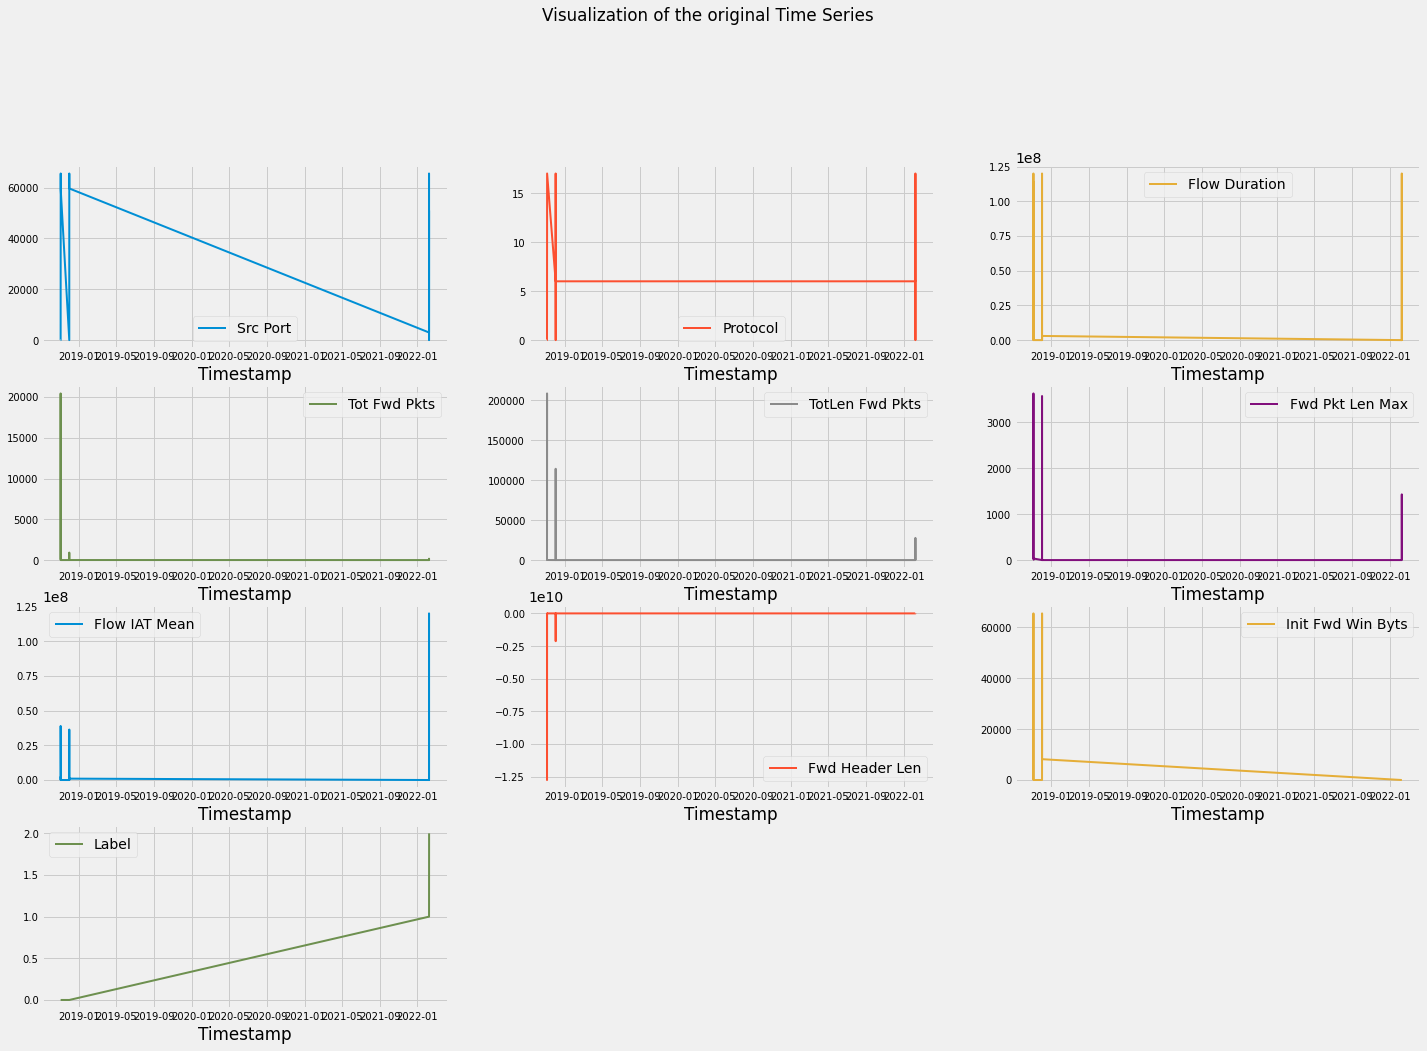

In [ ]:
# Plot timeseries
plt.style.use('fivethirtyeight')
df.plot(subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of the original Time Series')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Normalization
from keras.models import Model 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/Main1.csv')
df.drop(df.columns[0],axis=1,inplace=True)


# Label 0 for benign and 1 for any attack
df["Label1"] = np.where(df['Label']==0, 0, 1)


# Middle Label SQLi(10) as 1,MITM(11) as 2, Dictionary(12) as 3 and all Ddos as 0 
conditions = [
    (df['Label'] == 10),
    (df['Label'] == 11),
    (df['Label'] == 12),
    (df['Label'] == 0),
    df['Label'].isin([1,2,3,4,5,6,7,8,9,13])]
choices = [1, 2, 3, 4, 0]
df['Label2'] = np.select(conditions, choices)


# Innermost Label 0 tftp(1) 1 udp+ssdp(2) 2 ldap(3) 3 netmap + portbios (4)
# 4 syn(5) 5 mssql(6) 6 hulk(7) 7 rudy(8) 8 goldeneye(9) 9 httpbypass(13)
conditions = [
    (df['Label'] == 1),
    (df['Label'] == 2),
    (df['Label'] == 3),
    (df['Label'] == 4),
    (df['Label'] == 5),
    (df['Label'] == 6),
    (df['Label'] == 7),
    (df['Label'] == 8),
    (df['Label'] == 9),
    (df['Label'] == 13),
    (df['Label'].isin([0,10,11,12]))
]
choices = [0,1,2,3,4,5,6,7,8,9,10]
df['Label3'] = np.select(conditions, choices)


def split(df,label):
  X = df.drop(label,axis=1)
  y = df[label]
  y = pd.DataFrame(y)
  y.columns=[label]
  return X,y 

A = df.drop(['Label','Label2','Label3'],axis=1)
X1,y1 = split(A,'Label1')

# Smoting
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X1,y1 = oversample.fit_resample(X1,y1)

df2 = df[df["Label2"] != 4]
B = df2.drop(['Label','Label1','Label3'],axis=1)
X2,y2 = split(B,'Label2')

# Smoting
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X2,y2 = oversample.fit_resample(X2,y2)


df3 = df[df["Label3"] != 10]
C = df3.drop(['Label','Label1','Label2'],axis=1)
X3,y3 = split(C,'Label3')

# Smoting
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X3,y3 = oversample.fit_resample(X3,y3)

X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.30, random_state=42)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.30, random_state=42)
X_train3,X_test3,y_train3,y_test3 = train_test_split(X3,y3,test_size=0.30, random_state=42)

from sklearn.preprocessing import OneHotEncoder
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')
#perform one-hot encoding on 'team' column 
encoding2 = pd.DataFrame(encoder.fit_transform(y_train2).toarray())
encoding3 = pd.DataFrame(encoder.fit_transform(y_train3).toarray())


In [ ]:
# 5-5-1  6-4-4  9-9-9-10

normalizer1 = Normalization(axis=-1)
normalizer2 = Normalization(axis=-1)
normalizer3 = Normalization(axis=-1)

print('\n\nNormalizing...\n\n')

normalizer1.adapt(np.array(X_train1))
normalizer2.adapt(np.array(X_train2))
normalizer3.adapt(np.array(X_train3))



input_layer = Input(shape=(10,))
normal1 = normalizer1(input_layer) 
layer11 = Dense(8,activation='relu')(normal1)
#layer12 = Dense(5,activation='relu')(layer11)
output1 = Dense(1,activation='sigmoid')(layer11)

normal2 = normalizer2(input_layer)
layer21 = Dense(6,activation='relu')(normal2)
layer22 = Dense(4,activation='relu')(layer21)
output2 = Dense(4,activation='softmax')(layer22)

normal3 = normalizer3(input_layer)
layer31 = Dense(9,activation='relu')(normal3)
layer32 = Dense(9,activation='relu')(layer31)
layer33 = Dense(9,activation='relu')(layer32)
output3 = Dense(10,activation='softmax')(layer33)


model1 = Model(inputs = input_layer, outputs = output1, name = 'model1')
model2 = Model(inputs = input_layer, outputs = output2, name = 'model2')
model3 = Model(inputs = input_layer, outputs = output3, name = 'model3')

model1.summary()
print('\n\n')
model2.summary()
print('\n\n')
model3.summary()


model1.compile(optimizer='adam', 
			   loss='binary_crossentropy', 
			   metrics=['accuracy'])
model2.compile(optimizer='adam', 
			   loss='categorical_crossentropy', 
			   metrics=['accuracy'])
model3.compile(optimizer='adam', 
			   loss='categorical_crossentropy', 
			   metrics=['accuracy'])

print('\n\n\ncompiled!!\n\n\n')


model1.fit(X_train1,y_train1,validation_split=0.3,epochs=20,verbose=1,batch_size=10000)
print('\n\n\n\n')
model2.fit(X_train2,encoding2,validation_split=0.3,epochs=20,verbose=1,batch_size=10000)
print('\n\n\n\n')
model3.fit(X_train3,encoding3,validation_split=0.3,epochs=20,verbose=1,batch_size=10000)
print('\n\n\n\n')



Normalizing...


Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense (Dense)               (None, 8)                 88        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 118
Trainable params: 97
Non-trainable params: 21
_________________________________________________________________



Model: "model2"
_________________________________________________________________
 Layer (type)           

In [ ]:
encoding2_test = pd.DataFrame(encoder.fit_transform(y_test2).toarray())
encoding3_test = pd.DataFrame(encoder.fit_transform(y_test3).toarray())

In [ ]:
from sklearn.model_selection import KFold

acc_per_fold=[]
loss_per_fold=[]

normalizer1 = Normalization(axis=-1)
normalizer1.adapt(np.array(X_train1))

inputs1 = np.concatenate((X_train1, X_test1), axis=0)
targets1 = np.concatenate((y_train1, y_test1), axis=0)

kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1

for train, test in kfold.split(inputs1, targets1):
  input_layer = Input(shape=(
    10,))
  normal1 = normalizer1(input_layer) 
  layer11 = Dense(8,activation='relu')(normal1)
  output1 = Dense(1,activation='sigmoid')(layer11)

  model1 = Model(inputs = input_layer, outputs = output1, name = 'model1')

  model1.summary()
  model1.compile(optimizer='adam', 
          loss='binary_crossentropy', 
          metrics=['accuracy'])
  
  model1.fit(inputs1[train],targets1[train],epochs=20,verbose=1,batch_size=10000)

  scores = model1.evaluate(inputs1[test], targets1[test], verbose=0)

  print(f'Score for fold {fold_no}: {model1.metrics_names[0]} of {scores[0]}; {model1.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1


Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 10)]              0         
                                                                 
 normalization_7 (Normalizat  (None, 10)               21        
 ion)                                                            
                                                                 
 dense_15 (Dense)            (None, 8)                 88        
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 118
Trainable params: 97
Non-trainable params: 21
_________________________________________________________________
Epoch 1/20
298/298 [==============================] - 2s 5ms/step - loss: 0.5114 - accuracy: 0.7605
Epoch 2/20
298/298 [========

In [ ]:
accuracy1=np.mean(acc_per_fold)
loss1=np.mean(loss_per_fold)
print("Accuracy of Layer 1: ",accuracy1)
print("Loss of Layer 1: ",loss1)

Accuracy of Layer 1:  99.26426649093628
Loss of Layer 1:  0.051432115584611894


In [ ]:
acc_per_fold1=[]
loss_per_fold1=[]

normalizer2 = Normalization(axis=-1)
normalizer2.adapt(np.array(X_train2))

inputs2 = np.concatenate((X_train2, X_test2), axis=0)
targets2 = np.concatenate((encoding2, encoding2_test), axis=0)

kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1

for train, test in kfold.split(inputs2, targets2):
  input_layer = Input(shape=(10,))
  normal2 = normalizer2(input_layer)
  layer21 = Dense(6,activation='relu')(normal2)
  layer22 = Dense(4,activation='relu')(layer21)
  output2 = Dense(4,activation='softmax')(layer22)

  model2 = Model(inputs = input_layer, outputs = output2, name = 'model2')

  model2.summary()
  model2.compile(optimizer='adam', 
          loss='categorical_crossentropy', 
          metrics=['accuracy'])
  
  model2.fit(inputs2[train],targets2[train],epochs=20,verbose=1,batch_size=10000)

  scores = model2.evaluate(inputs2[test], targets2[test], verbose=0)

  print(f'Score for fold {fold_no}: {model2.metrics_names[0]} of {scores[0]}; {model2.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold1.append(scores[1] * 100)
  loss_per_fold1.append(scores[0])

  fold_no = fold_no + 1

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 10)]              0         
                                                                 
 normalization_9 (Normalizat  (None, 10)               21        
 ion)                                                            
                                                                 
 dense_25 (Dense)            (None, 6)                 66        
                                                                 
 dense_26 (Dense)            (None, 4)                 28        
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
Total params: 135
Trainable params: 114
Non-trainable params: 21
_____________________________________________________________

In [ ]:
accuracy2=np.mean(acc_per_fold1)
loss2=np.mean(loss_per_fold1)
print("Accuracy of Layer 2: ",accuracy2)
print("Loss of Layer 2: ",loss2)

Accuracy of Layer 2:  96.83452248573303
Loss of Layer 2:  0.1118610605597496


In [ ]:
acc_per_fold2=[]
loss_per_fold2=[]

normalizer3 = Normalization(axis=-1)
normalizer3.adapt(np.array(X_train3))

inputs3 = np.concatenate((X_train3, X_test3), axis=0)
targets3 = np.concatenate((encoding3, encoding3_test), axis=0)

kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1

for train, test in kfold.split(inputs3, targets3):
  input_layer = Input(shape=(10,))
  normal3 = normalizer3(input_layer)
  layer31 = Dense(9,activation='relu')(normal3)
  layer32 = Dense(9,activation='relu')(layer31)
  layer33 = Dense(9,activation='relu')(layer32)
  output3 = Dense(10,activation='softmax')(layer33)
  model3 = Model(inputs = input_layer, outputs = output3, name = 'model3')
  model3.summary()
  model3.compile(optimizer='adam', 
          loss='categorical_crossentropy', 
          metrics=['accuracy'])
  
  model3.fit(inputs3[train],targets3[train],epochs=20,verbose=1,batch_size=10000)

  scores = model3.evaluate(inputs3[test], targets3[test], verbose=0)

  print(f'Score for fold {fold_no}: {model3.metrics_names[0]} of {scores[0]}; {model3.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold2.append(scores[1] * 100)
  loss_per_fold2.append(scores[0])

  fold_no = fold_no + 1

Model: "model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 10)]              0         
                                                                 
 normalization_10 (Normaliza  (None, 10)               21        
 tion)                                                           
                                                                 
 dense_40 (Dense)            (None, 9)                 99        
                                                                 
 dense_41 (Dense)            (None, 9)                 90        
                                                                 
 dense_42 (Dense)            (None, 9)                 90        
                                                                 
 dense_43 (Dense)            (None, 10)                100       
                                                            

In [ ]:
accuracy3=np.mean(acc_per_fold2)
loss3=np.mean(loss_per_fold2)
print("Accuracy of Layer 3: ",accuracy3)
print("Loss of Layer 3: ",loss3)

Accuracy of Layer 3:  96.58263802528381
Loss of Layer 3:  0.12083018720149993


Layer 1 accuracy:  0.9904715707248493
Layer 2 accuracy:  0.9747846148216869
Layer 3 accuracy:  0.9668574383112252


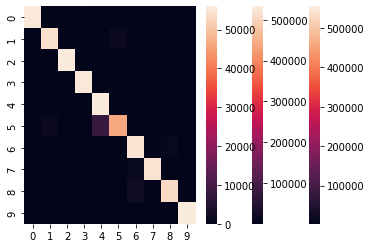

In [ ]:
from sklearn.metrics import accuracy_score
import seaborn as sns

layer1pred = model1.predict(X_test1)
layer2pred = model2.predict(X_test2)
layer3pred = model3.predict(X_test3)

n1 = []
for i in range(len(layer1pred)):
  if layer1pred[i] >= 0.5:
    n1.append(1)
  else:
    n1.append(0)

accuracylayer1 = accuracy_score(y_test1, n1)

print("Layer 1 accuracy: ",accuracylayer1)

n2 = []
for i in layer2pred:
  i=list(i)
  maxvalue=max(i)
  n2.append(i.index(maxvalue))

accuracylayer2 = accuracy_score(y_test2, n2)

print("Layer 2 accuracy: ",accuracylayer2)

n3 = []
for i in layer3pred:
  i=list(i)
  maxvalue=max(i)
  n3.append(i.index(maxvalue))

accuracylayer3 = accuracy_score(y_test3, n3)

print("Layer 3 accuracy: ", accuracylayer3)


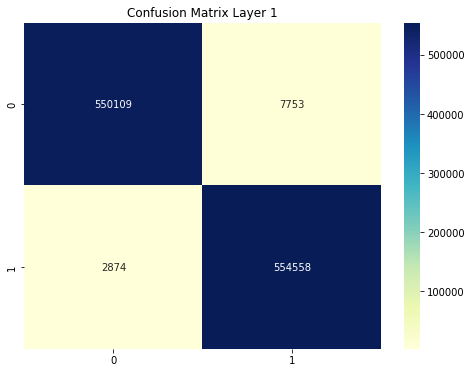

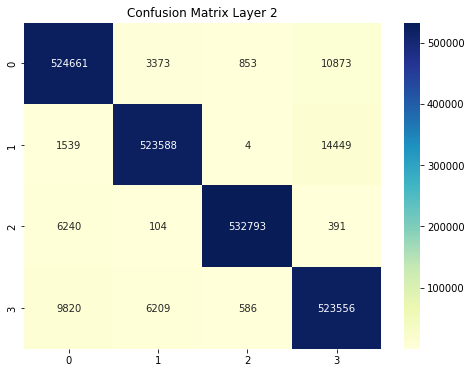

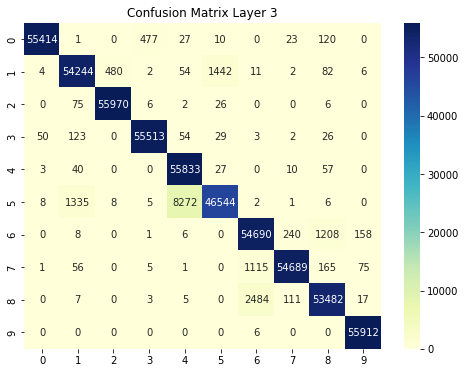

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.title("Confusion Matrix Layer 1")
sns.heatmap(confusion_matrix(y_test1,n1),annot=True,cmap="YlGnBu",fmt="d")
plt.savefig("/content/drive/MyDrive/Plots/Confusion Matrices/Layer1 Matrix.png",dpi=300)

plt.figure(figsize=(8,6))
plt.title("Confusion Matrix Layer 2")
sns.heatmap(confusion_matrix(y_test2,n2),annot=True,cmap="YlGnBu",fmt="d")
plt.savefig("/content/drive/MyDrive/Plots/Confusion Matrices/Layer2 Matrix.png",dpi=300)

plt.figure(figsize=(8,6))
plt.title("Confusion Matrix Layer 3")
sns.heatmap(confusion_matrix(y_test3,n3),annot=True,cmap="YlGnBu",fmt="d")
plt.savefig("/content/drive/MyDrive/Plots/Confusion Matrices/Layer3 Matrix.png",dpi=300)

In [ ]:
print("F1 score Layer 1: ",f1_score(y_test1,n1, average='macro'))
print("F1 score Layer 2: ",f1_score(y_test2,n2, average='macro'))
print("F1 score Layer 3: ",f1_score(y_test3,n3, average='macro'))

F1 score Layer 1:  0.9904714190986301
F1 score Layer 2:  0.9748442792477897
F1 score Layer 3:  0.9666626570437529


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

print("Precision Recall FScore and Support for Layers: ")
print("Layer 1:")
print(precision_recall_fscore_support(y_test1, n1, average='macro'))
print("Layer 2:")
print(precision_recall_fscore_support(y_test2, n2, average='macro'))
print("Layer 3:")
print(precision_recall_fscore_support(y_test3, n3, average='macro'))


Precision Recall FScore and Support for Layers: 
Layer 1:
(0.9905074948724475, 0.9904732559415217, 0.9904714190986301, None)
Layer 2:
(0.9749669092367608, 0.9747866695174421, 0.9748442792477897, None)
Layer 3:
(0.9684861688053802, 0.9669121587650389, 0.9666626570437529, None)


In [ ]:
benign = df[df['Label1']==0]
SQLi = df[df['Label2']==1]
Rudy = df[df['Label3']==7]

In [ ]:
#benign
from sklearn.model_selection import train_test_split
benign = pd.concat([benign],axis=0,ignore_index=True)
X= benign.drop(['Label','Label2','Label3','Label1'],axis=1)
y=benign['Label1']
X_train3,X_test3,y_train3,y_test3 = train_test_split(X,y,random_state=42,test_size=0.3)



In [ ]:
#SQLi 
SQLi = pd.concat([SQLi],axis=0,ignore_index=True)
X1 = SQLi.drop(['Label','Label1','Label2','Label3'],axis=1)
y1 = SQLi['Label1']

X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,random_state=42,test_size=0.3)



In [ ]:
#Rudy
Rudy = pd.concat([Rudy],axis=0,ignore_index=True)
X2 = Rudy.drop(['Label','Label1','Label2','Label3'],axis=1)
y2 = Rudy['Label3']

X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,random_state=42,test_size=0.3)


In [ ]:
yhat1 = model1.predict(X_test3)

1753/1753 [==============================] - 1s 350us/step


In [ ]:
yhat1 = model1.predict(X_test1)
yhat2 = model2.predict(X_test1)

436/436 [==============================] - 0s 339us/step


In [ ]:
yhat1 = model1.predict(X_test2)


yhat2 = model2.predict(X_test2)


yhat3 = model3.predict(X_test2)

1753/1753 [==============================] - 1s 335us/step


## DDN

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Normalization
from keras.models import Model 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/Main1.csv')
df.drop(df.columns[0],axis=1,inplace=True)

def split(df,label):
  X = df.drop(label,axis=1)
  y = df[label]
  y = pd.DataFrame(y)
  y.columns=[label]
  return X,y 


X,y = split(df,'Label')

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')
#perform one-hot encoding on 'team' column 
encoding = pd.DataFrame(encoder.fit_transform(y_train).toarray())

In [ ]:
normalizer = Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

input_layer = Input(shape=(10,))
normal = normalizer(input_layer)
layer1 = Dense(9,activation='relu')(normal)
layer2 = Dense(9,activation='relu')(layer1)
layer3 = Dense(9,activation='relu')(layer2)
output = Dense(14,activation='softmax')(layer3) 

model = Model(inputs = input_layer, outputs = output, name = 'DNN')
model.compile(optimizer='adam', 
			   loss='categorical_crossentropy', 
			   metrics=['accuracy'])



In [ ]:
model.fit(X_train,encoding,validation_split=0.3,epochs=20,verbose=1,batch_size=10000)

Epoch 1/20
129/129 [==============================] - 3s 21ms/step - loss: 2.5147 - accuracy: 0.2041 - val_loss: 2.2565 - val_accuracy: 0.3089
Epoch 2/20
129/129 [==============================] - 2s 18ms/step - loss: 1.8573 - accuracy: 0.4303 - val_loss: 1.4691 - val_accuracy: 0.5640
Epoch 3/20
129/129 [==============================] - 2s 18ms/step - loss: 1.2510 - accuracy: 0.6270 - val_loss: 1.0517 - val_accuracy: 0.6853
Epoch 4/20
129/129 [==============================] - 3s 24ms/step - loss: 0.9007 - accuracy: 0.7622 - val_loss: 0.7581 - val_accuracy: 0.7901
Epoch 5/20
129/129 [==============================] - 4s 31ms/step - loss: 0.6823 - accuracy: 0.8222 - val_loss: 0.6105 - val_accuracy: 0.8369
Epoch 6/20
129/129 [==============================] - 3s 26ms/step - loss: 0.5735 - accuracy: 0.8444 - val_loss: 0.5293 - val_accuracy: 0.8554
Epoch 7/20
129/129 [==============================] - 4s 31ms/step - loss: 0.5109 - accuracy: 0.8631 - val_loss: 0.4820 - val_accuracy: 0.8719

In [ ]:
dnnpred = model.predict(X_test)

n = []
for i in dnnpred:
  i=list(i)
  maxvalue=max(i)
  n.append(i.index(maxvalue))

accuracydnn= accuracy_score(y_test, n)

print("DNN accuracy: ",accuracydnn)

DNN accuracy:  0.9218753183772439


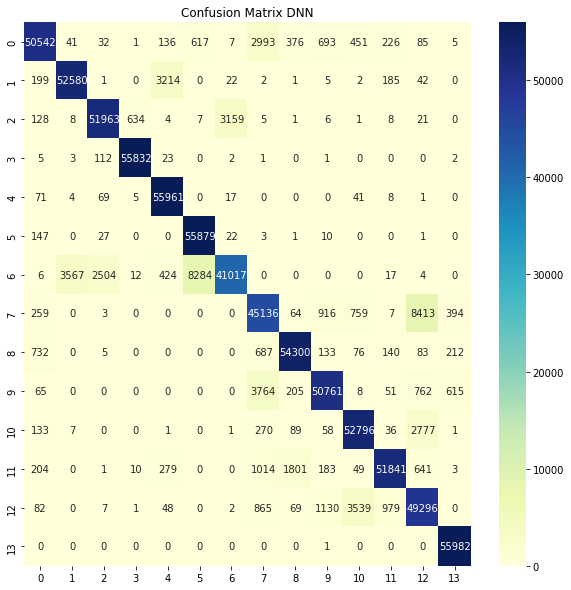

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix DNN")
sns.heatmap(confusion_matrix(y_test,n),annot=True,cmap="YlGnBu",fmt="d")
plt.savefig("/content/drive/MyDrive/Plots/Confusion Matrices/DNN Matrix.png",dpi=300)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

print("Precision Recall FScore and Support for DNN: ")
print(precision_recall_fscore_support(y_test, n, average='macro'))

Precision Recall FScore and Support for DNN: 
(0.9236815786708085, 0.9217923343227732, 0.9211817829474744, None)
